In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [38]:
engagement = pd.read_csv('takehome_user_engagement.csv',parse_dates=True)
users = pd.read_csv('takehome_users.csv',encoding='latin-1',parse_dates=True)

In [39]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [40]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [41]:
users['creation_time'] = pd.to_datetime(users['creation_time'])

In [42]:
engagement.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [43]:
engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [44]:
engagement['time_stamp'] = pd.to_datetime(engagement['time_stamp'])

engagement.sort_values(by='time_stamp',inplace=True)

In [45]:
import datetime as dt
engagement['time_stamp'].min() + dt.timedelta(days=7)

Timestamp('2012-06-07 08:20:06')

In [46]:
engagement['user_id'].value_counts()

user_id
3623    606
906     600
1811    593
7590    590
8068    585
       ... 
3075      1
7830      1
7687      1
8287      1
4051      1
Name: count, Length: 8823, dtype: int64

In [47]:
for r in engagement['user_id'].value_counts():
    print(r)
    break

606


In [48]:

adopted_users = set()
first_date = engagement['time_stamp'].min()
last_date = engagement['time_stamp'].max()
week_delta = dt.timedelta(days=7)
date_pointer = engagement['time_stamp'].min() + week_delta

while date_pointer < last_date + dt.timedelta(days=1):

    window = engagement[(engagement['time_stamp'] >= date_pointer - week_delta) & (engagement['time_stamp'] < date_pointer)]
    
    visit_numbers = window['user_id'].value_counts()
    adopted_users = adopted_users.union([u for u,v in visit_numbers.to_dict().items() if v > 2])
    
    date_pointer += dt.timedelta(days=1)  


In [49]:
len(adopted_users)

1602

In [59]:
users['adopted'] = [1 if u in adopted_users else 0 for u in users['object_id']]
users['creation_month'] = users['creation_time'].dt.month
users['creation_weekday'] = users['creation_time'].dt.day_of_week

In [60]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted,creation_month,creation_weekday
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0,4,1
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1,11,4
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0,3,1
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0,5,1
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0,1,3


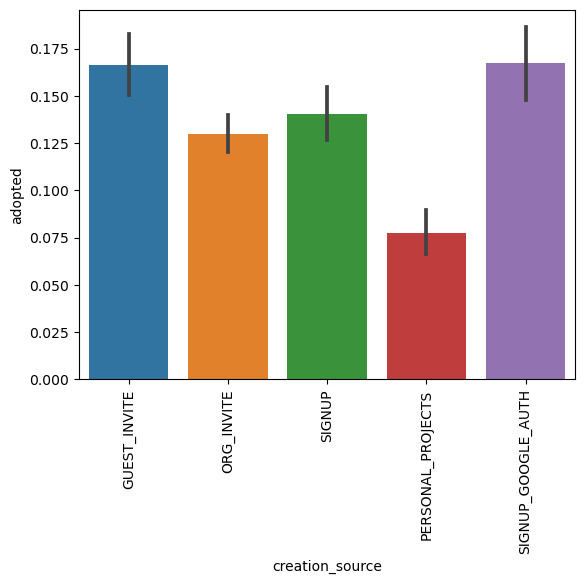

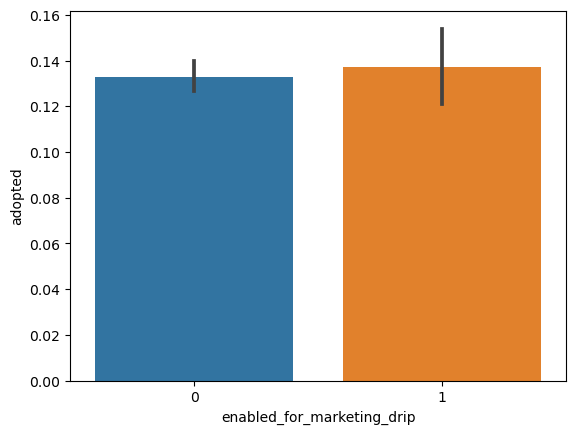

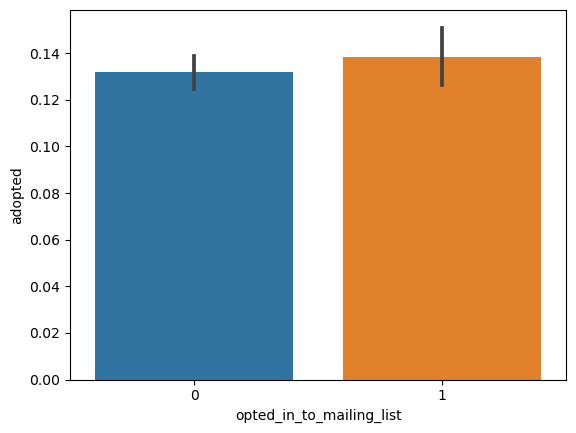

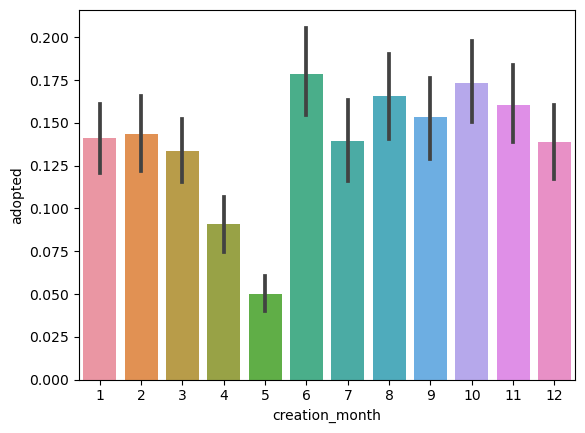

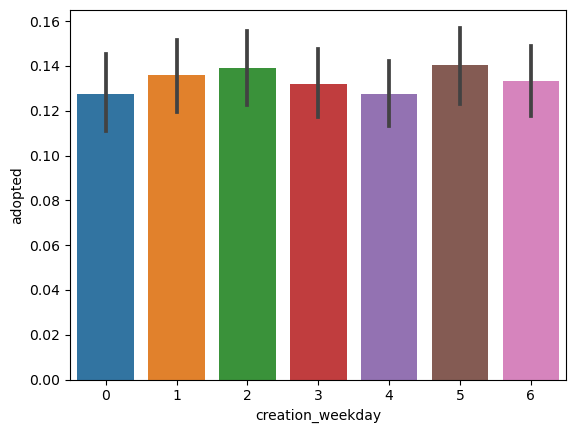

In [62]:
import seaborn as sns

for v in ['creation_source','enabled_for_marketing_drip','opted_in_to_mailing_list','creation_month','creation_weekday']:
    if v == 'creation_month':
        sns.categorical.barplot(users,x=v,y='adopted')

    if v == 'creation_source':
        plt.xticks(rotation=90)
    plt.show()

Text(0.5, 1.0, '2012')

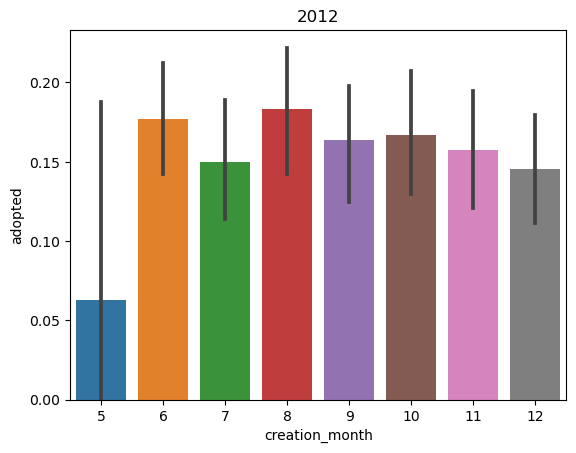

In [67]:
sns.categorical.barplot(users[users['creation_time'].dt.year == 2012],x='creation_month',y='adopted');
plt.title('2012')

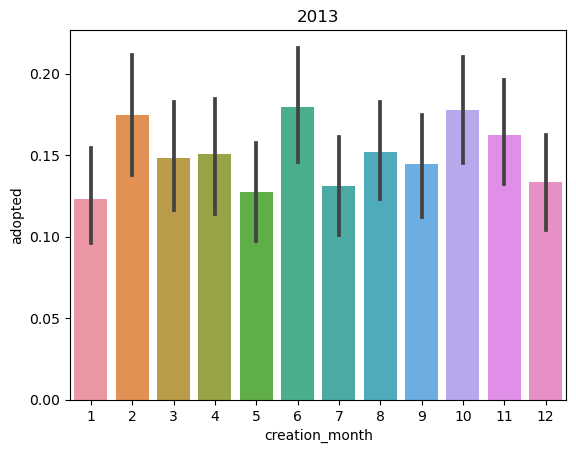

In [68]:
sns.categorical.barplot(users[users['creation_time'].dt.year == 2013],x='creation_month',y='adopted')
plt.title('2013');

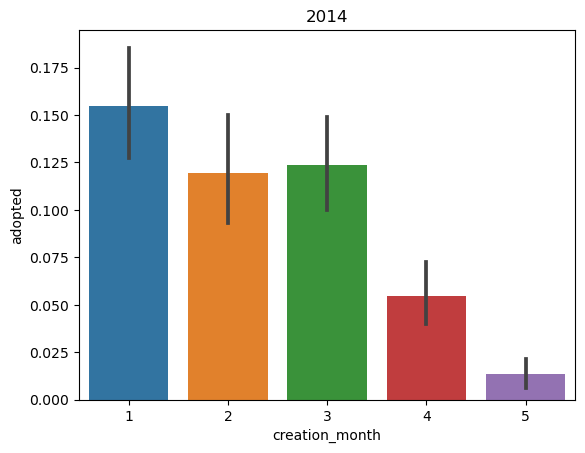

In [69]:
sns.categorical.barplot(users[users['creation_time'].dt.year == 2014],x='creation_month',y='adopted')
plt.title('2014');

- Surprisingly, guest invites who have limited permissions have a higher adoption rate than organization invites
- Those who signed up using google auth also had a significantly higher adoption rate than those who signed up without it. This may be because it's easier to login through google as well and this reduces some friction for new users
- Users who signed up through personal projects had the lowest adoption rate

- There's no statistical (or meaningful) difference in adoption_rate between users who get mail or marketing as shown by the black confidence interval bars. Although the adoption rate is slightly higher on the mailing and marketing side

- There isn't much variation in adoption when looking at the weekday users signed up
- However, the months show an interesting trend. The adoption rate consistently seems to fall between Feb and May before spiking back in June. Although for 2012 and 2014, this could be because may is where the data starts and ends so those months might be incomplete.
